<a href="https://colab.research.google.com/github/earandir/DataAnalysis/blob/main/Modulo03/Sesion08/M03S08R04_las_mejores_50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reto 4: Las mejores 50

### 1. Objetivos:
    - Practicar las siguientes herramientas:
        - Lectura de .csv
        - Agrupaciones y reducciones
        - Reordenamiento
        - Unión de `DataFrames` usando `merge`
    
---
    
### 2. Desarrollo:

#### a) Las 50 películas con mejor rating

Vamos a hacer una visualización muy sencilla de las 50 películas que tienen mejor rating en nuestro dataset. Tu Reto consiste en seguir los siguientes pasos:

1. Lee los archivos `movies` y `ratings`.
2. Agrupa `ratings` por id de película y computa el promedio de `rating` para cada película
3. Crea un nuevo `DataFrame` que sólo contenga las 50 películas con mejor promedio de ratings
4. Agrega al `DataFrame` anterior los nombres de las películas usando la tabla `movies`.
5. Al final tendrás un `DataFrame` con los nombres de las 50 películas con mejor rating ('title') y el promedio de sus ratings ('rating'). Asigna este resultado a la variable `las_mejores_50`.

In [1]:
import pandas as pd

In [4]:
movies = pd.read_csv('movies.csv', index_col=0)

movies.head(3)

,title,genres
movie_id,,
1,Toy Story (1995),Animation|Children's|Comedy
2,Jumanji (1995),Adventure|Children's|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance


In [17]:
ratings = pd.read_csv('ratings.csv', index_col=0)

ratings.head(3)

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,movie_id,rating,timestamp
user_id,,,
1,1193,5,978300760
1,661,3,978302109
1,914,3,978301968


In [18]:
ratings = ratings.groupby('movie_id').mean()





In [21]:
top_50 = ratings.sort_values('rating', ascending=False).head(50)

top_50.head(3)

,rating,timestamp
movie_id,,
989,5.0,974693867.0
3881,5.0,972452947.0
1830,5.0,972439040.0


In [23]:
pd.merge(top_50, movies, left_on='movie_id', right_index=True)

,rating,timestamp,title,genres
movie_id,,,,
989,5.000000,9.746939e+08,Schlafes Bruder (Brother of Sleep) (1995),Drama
3881,5.000000,9.724529e+08,Bittersweet Motel (2000),Documentary
1830,5.000000,9.724390e+08,Follow the Bitch (1998),Comedy
3382,5.000000,9.607962e+08,Song of Freedom (1936),Drama
787,5.000000,9.741198e+08,"Gate of Heavenly Peace, The (1995)",Documentary
3280,5.000000,9.779795e+08,"Baby, The (1973)",Horror
3607,5.000000,9.577566e+08,One Little Indian (1973),Comedy|Drama|Western
3233,5.000000,9.664246e+08,Smashing Time (1967),Comedy
3172,5.000000,9.670604e+08,Ulysses (Ulisse) (1954),Adventure


In [24]:
las_mejores_50 = pd.merge(top_50, movies, left_on='movie_id', right_index=True)

La celda de validación lo que hará es realizar una gráfica de barras mostrando el nombre de la película y el rating promedio, no olvides comparar tus resultados ...

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


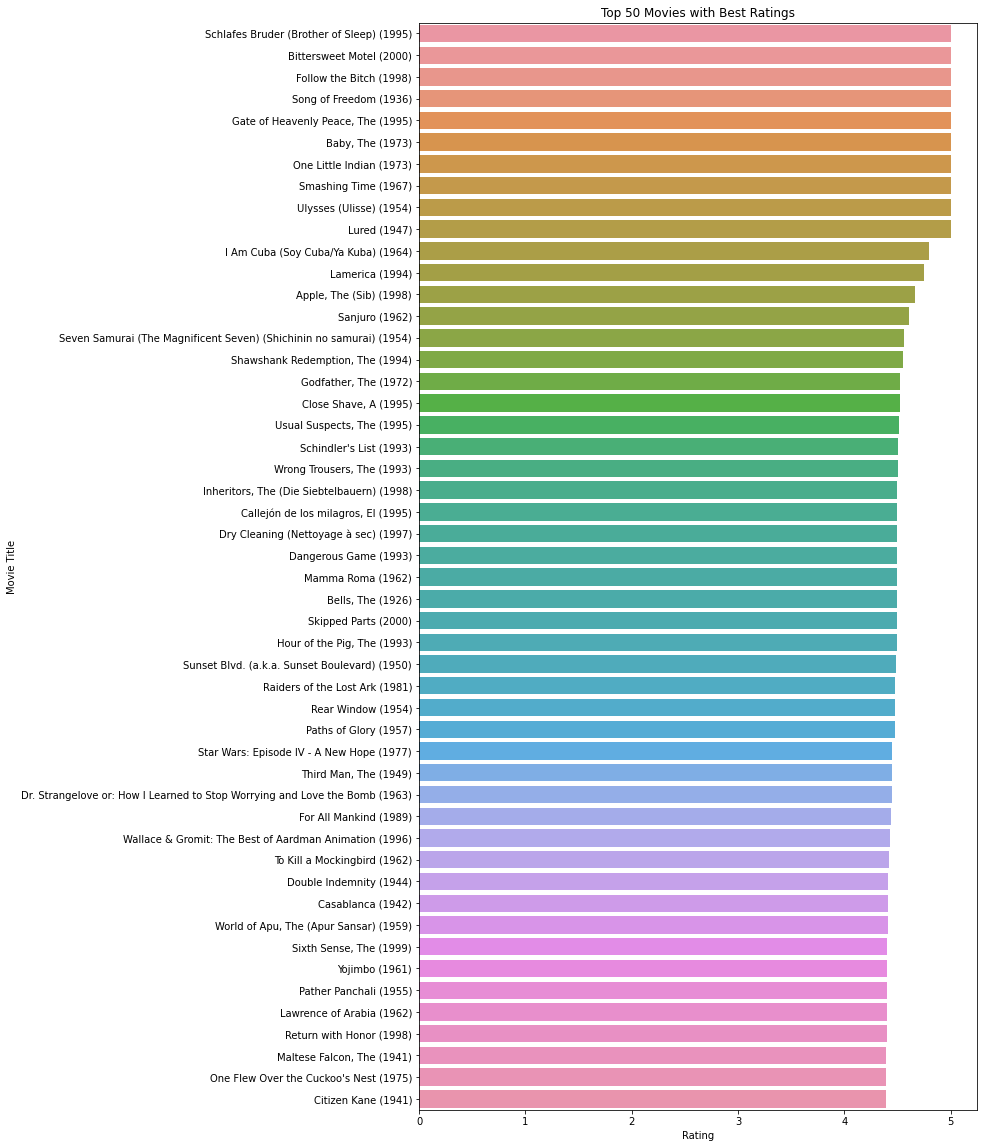

In [25]:
def plotting_best_50(las_mejores_50):
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    fig, ax = plt.subplots(figsize=(10, 20))
    ax.set_title('Top 50 Movies with Best Ratings')
    splot = sns.barplot(las_mejores_50['rating'], las_mejores_50['title'], ax=ax)
    ax.set(xlabel='Rating', ylabel='Movie Title')
    
plotting_best_50(las_mejores_50)